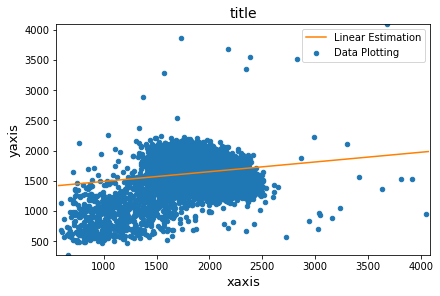

In [5]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt
from sympy import *
#Input Sections
which = input('Which kind of data file are you choosing? csv or dat format?: ')
File = input('What is the name of your experimental data file?: ')
xaxisdata = input('Which Columns do you want to use for x axis to this Data plotting?')
yaxisdata = input('Which Columns do you want to use for y axis to this Data plotting?')
Title = input('What is the title of your Graph?: ')
Xlabel = input('What is the label of x axis?: ')
Ylabel = input('What is the label of y axis?: ')

#Importing basic data from a CSV-style experimental data file
xaxisdata = int(xaxisdata)
yaxisdata = int(yaxisdata)

if (which == 'csv'):
  df = pd.read_csv(File)
elif (which == 'dat'):
  df = pd.read_csv(File, sep='\s+')

df = df[df > 0]
num = len(df)
Xstd = df[df.columns[xaxisdata]].std()
Ystd = df[df.columns[yaxisdata]].std()

#Errors for direct observables
err_df0 = DataFrame(Xstd/np.sqrt(num -1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
err_df1 =  DataFrame(Ystd/np.sqrt(num - 1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])

#Preparing Plotting Figure & Environment
fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([df[df.columns[xaxisdata]].min() - 40, df[df.columns[xaxisdata]].max() + 40, df[df.columns[yaxisdata]].min() - 1, df[df.columns[yaxisdata]].max() + 1])

#Creating Scatter Graph of Experimental Data
df.plot(kind='scatter', x=df.columns[xaxisdata], y=df.columns[yaxisdata], xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title(Title, fontsize = 14)
axes.set_xlabel(Xlabel, fontsize = 13)
axes.set_ylabel(Ylabel, fontsize = 13)

#Linear Estimation by using Least Squared Regression
df2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()
a = Cov / (df[df.columns[xaxisdata]].std())**2
b = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()
x1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)
l = a.values[0]
k = b.values[0]
errdf0 = err_df0.values[0][0]
errdf1 = err_df1.values[0][0]
y1 = l * x1 + k

#Error Propagation Law for arbitrary functions f(x, y)
import math
x, y = symbols("x y")
function = input("f(x,y)= ")
f = eval(function)
err_f = math.sqrt(errdf0**2 * (diff(f, x).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2 + errdf1**2 * (diff(f, y).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2)

#Creating a new columns for some indirect observables
def indirect(frame):
    return f.subs([(x, frame.iloc[xaxisdata]), (y, frame.iloc[yaxisdata])])
df['f(x, y)'] = df.apply(indirect, axis = 1)

#Plotting on the Scatter Graph
axes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')
axes.legend()
plt.savefig("figure.svg", transparent=True)

#Identification of the regression line
x = symbols('x')
eq = l * x + k

In [6]:
df

A1    A2    A3    A4  Cathode f(x, y)
0      1580  1816  1816  1558     3127    3396
1      2167  1529  1708  1337     3044    3696
2      1904  1619  1790  1568     3153    3523
3      2451  1435  1761  1307     3209    3886
4      1662  1681  1561  1626     3079    3343
...     ...   ...   ...   ...      ...     ...
18494  1785  1730  1791  1743     3251    3515
18495  2076  1576  1639  1809     3301    3652
18496  2171  1650  1498  1341     3140    3821
18497   871   857  1188  1700     2075    1728
18498  1223  1719  1312  1292     2440    2942

[18499 rows x 6 columns]

In [7]:
eq

0.160715279750532*x + 1329.83765342487

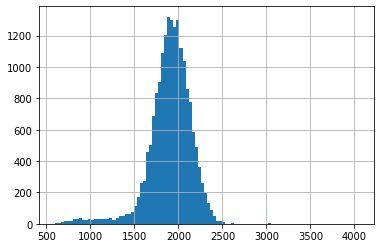

In [10]:
df['A1'].hist(bins = 100); # 基数の数を1000個にする  
plt.savefig("A1_histgram.png")

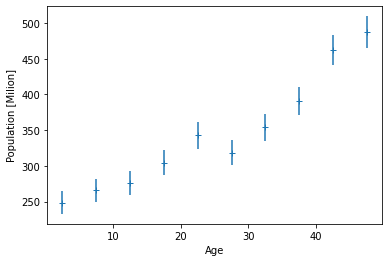

In [11]:
import matplotlib.pyplot as plt
import math

#X axis value
x = [2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5]

#Y axis values and its errors
y = [248.4,265.7,276.1,304.2,342.5,318.3,353.7,390.5,462.2,487.4]
yerr = []

for i in range(len(y)):
    yerr.append(math.sqrt(y[i]))

#Plot data points
plt.errorbar(x,y,yerr=yerr,marker="+",linestyle='None')

#Decorations
plt.xlabel("Age")
plt.ylabel("Population [Milion]")
#plt.yscale('log')

#Display and save the resulting figure
plt.savefig("graph.png")
plt.show()